# Exercise 1


## a) reading sheets

- datastructure: dictionary of dataframes

In [61]:
import pandas as pd

sheet_names = pd.ExcelFile("riket2023_åk9_np.xlsx").sheet_names

print(sheet_names[:-1])
df_dict = dict()

for sheet_name in sheet_names[:-1]:
    df_dict[sheet_name] = pd.read_excel("riket2023_åk9_np.xlsx", skiprows=8, sheet_name=sheet_name)

df_dict["Matematik"]

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']


,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [62]:
subjects = df_dict.keys()
subjects

dict_keys(['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk'])

## b) change name of columns

In [63]:
df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', 'Totalt', 'Flickor', 'Pojkar', 'Totalt ',
       'Flickor ', 'Pojkar ', 'Totalt  ', 'Flickor  ', 'Pojkar  '],
      dtype='object')

In [64]:
import numpy as np

postfixes = (
    [""] * 2 + ["_A_F_antal"] * 3 + ["_A_E_andel"] * 3 + ["_genomsnitt_betyg"] * 3
)

for subject in subjects:
    new_columns = df_dict[subject].columns.str.strip() + np.array(postfixes)
    df_dict[subject].columns = new_columns
    df_dict[subject] = df_dict[subject].rename({"Typ av huvudman": "Huvudman"}, axis=1)

df_dict["Svenska som andraspråk"]

,Riket,Huvudman,Totalt_A_F_antal,Flickor_A_F_antal,Pojkar_A_F_antal,Totalt_A_E_andel,Flickor_A_E_andel,Pojkar_A_E_andel,Totalt_genomsnitt_betyg,Flickor_genomsnitt_betyg,Pojkar_genomsnitt_betyg
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
3,Riket,Skolverket,..,..,..,..,..,..,..,..,..


## c) EDA on dataset

- I present only for math 

In [65]:

df_dict["Matematik"].head()

,Riket,Huvudman,Totalt_A_F_antal,Flickor_A_F_antal,Pojkar_A_F_antal,Totalt_A_E_andel,Flickor_A_E_andel,Pojkar_A_E_andel,Totalt_genomsnitt_betyg,Flickor_genomsnitt_betyg,Pojkar_genomsnitt_betyg
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [66]:
df_dict["Matematik"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Riket                     4 non-null      object 
 1   Huvudman                  4 non-null      object 
 2   Totalt_A_F_antal          4 non-null      int64  
 3   Flickor_A_F_antal         4 non-null      int64  
 4   Pojkar_A_F_antal          4 non-null      int64  
 5   Totalt_A_E_andel          4 non-null      object 
 6   Flickor_A_E_andel         4 non-null      object 
 7   Pojkar_A_E_andel          4 non-null      object 
 8   Totalt_genomsnitt_betyg   4 non-null      float64
 9   Flickor_genomsnitt_betyg  4 non-null      float64
 10  Pojkar_genomsnitt_betyg   4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [67]:
df_dict["Matematik"]["Totalt_A_F_antal"]

0    106766
1     84163
2     22553
3        50
Name: Totalt_A_F_antal, dtype: int64

In [68]:
df_dict["Matematik"].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Totalt_A_F_antal,4.0,53383.000,50305.900509,50.0,16927.250,53358.00,89813.750,106766.0
Flickor_A_F_antal,4.0,25774.000,24187.203159,25.0,8359.000,25761.50,43176.500,51548.0
Pojkar_A_F_antal,4.0,27609.000,26119.924770,25.0,8568.250,27596.50,46637.250,55218.0
Totalt_genomsnitt_betyg,4.0,12.650,1.138713,11.6,11.825,12.45,13.275,14.1
Flickor_genomsnitt_betyg,4.0,12.400,0.920145,11.5,11.725,12.30,12.975,13.5
Pojkar_genomsnitt_betyg,4.0,12.875,1.357387,11.7,11.925,12.55,13.500,14.7


## d) amount of students with fail in mathematics

In [69]:
df_dict["Matematik"].head()

,Riket,Huvudman,Totalt_A_F_antal,Flickor_A_F_antal,Pojkar_A_F_antal,Totalt_A_E_andel,Flickor_A_E_andel,Pojkar_A_E_andel,Totalt_genomsnitt_betyg,Flickor_genomsnitt_betyg,Pojkar_genomsnitt_betyg
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [93]:
import duckdb

df_math = df_dict["Matematik"]

total_students = (
    duckdb.query(
        f"""
            SELECT totalt_a_f_antal
            FROM df_math
            WHERE huvudman = 'Samtliga'
             """
    )
    .df()
    .values[0][0]
)

students_passed = (
    df_math.query("Huvudman == 'Samtliga'")["Totalt_A_E_andel"] * 0.01 * total_students
)
total_students - students_passed

0    11637.494
Name: Totalt_A_E_andel, dtype: object

## e) bar chart total points

In [100]:
total_points = {}

for subject in subjects:
    total_points[subject] = df_dict[subject].query("Huvudman == 'Samtliga'")["Totalt_genomsnitt_betyg"].values[0]

total_points

{'Engelska': np.float64(15.7),
 'Matematik': np.float64(11.9),
 'Svenska': np.float64(13.6),
 'Svenska som andraspråk': 9.4}

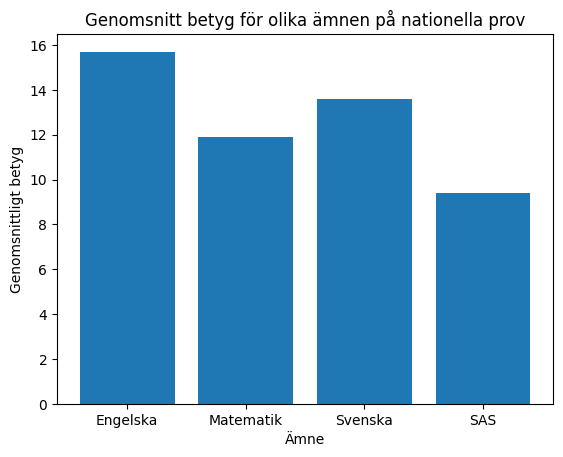

In [109]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

ax.bar(total_points.keys(), total_points.values())
ax.set(
    xlabel="Ämne",
    ylabel="Genomsnittligt betyg",
    title="Genomsnitt betyg för olika ämnen på nationella prov",
)

subjects = list(subjects)
subjects[-1] = "SAS"
ax.set_xticks(labels = subjects, ticks = range(len(subjects)));

--- 

## 1. Grades data

In [169]:
sheets = pd.ExcelFile("betyg_o_prov_riksnivå.xlsx").sheet_names
df = pd.read_excel("betyg_o_prov_riksnivå.xlsx",sheet_name=sheets[1], skiprows=7, index_col=0)

postfixes = ["_16"]*3 + ["_17"]*3 + ["_andel_F"]*3

df.columns = df.columns.str.replace(r"\.\d+", "", regex=True)
df.columns = df.columns + np.array(postfixes)
df_years = df.head()
df_years

,Totalt_16,Flickor_16,Pojkar_16,Totalt_17,Flickor_17,Pojkar_17,Totalt_andel_F,Flickor_andel_F,Pojkar_andel_F
2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


<Axes: >

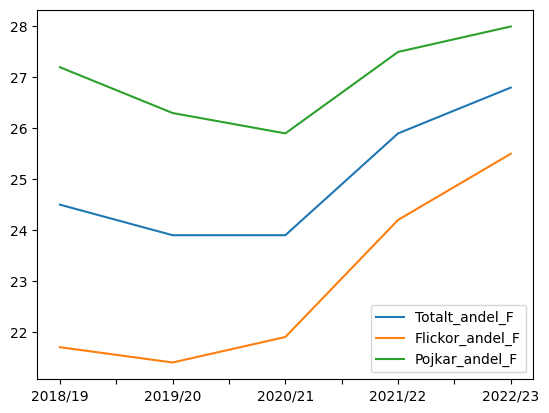

In [ ]:
df_years[["Totalt_andel_F", "Flickor_andel_F", "Pojkar_andel_F"]].plot()

## 2. OS 

In [115]:
df = pd.read_csv("athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<Axes: xlabel='Year', ylabel='count'>

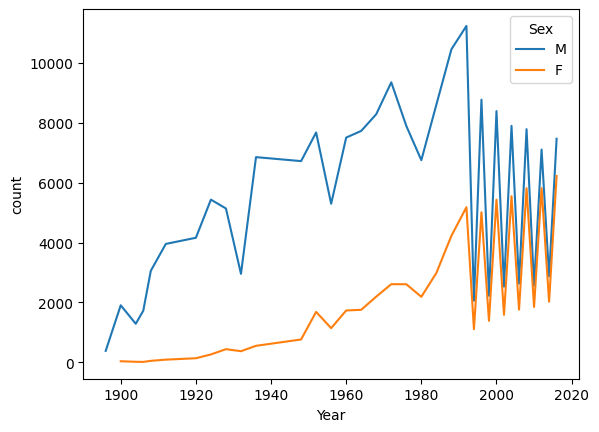

In [ ]:
import seaborn as sns

# can also use groupby with size
male_female_count = (
    df[["Year", "Sex"]].value_counts().reset_index().sort_values(by="Year")
)

sns.lineplot(male_female_count, x="Year", y="count", hue="Sex")